In [54]:
import pandas as pd 
import numpy as np 

In [55]:
df = pd.read_csv("./source/TrafficTwoMonth.csv")
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [56]:
from datetime import datetime, timedelta

def generate_datetime(input_time, input_date, input_day_of_week, year=2023, month=12):
    # Mapping of weekday to integer
    weekday_to_int = {
        'Monday': 0,
        'Tuesday': 1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6
    }

    # Convert time string to datetime object
    time_object = datetime.strptime(input_time, '%I:%M:%S %p')

    # Create a datetime object with the input date and time
    dt = datetime(year=year, month=month, day=input_date, hour=time_object.hour, minute=time_object.minute, second=time_object.second)

    # Calculate the difference between the desired and current weekday
    weekday_diff = weekday_to_int[input_day_of_week] - dt.weekday()
    if weekday_diff < 0:
        # If the desired weekday is before the current date, move to the next week
        weekday_diff += 7

    # Create the final datetime object
    final_dt = dt + timedelta(days=weekday_diff)

    return final_dt

In [57]:
import copy 
new_df = copy.copy(df)

In [58]:
new_df = new_df.drop(["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"], axis=1)
new_df

,Time,Date,Day of the week,Traffic Situation
0,12:00:00 AM,10,Tuesday,normal
1,12:15:00 AM,10,Tuesday,normal
2,12:30:00 AM,10,Tuesday,normal
3,12:45:00 AM,10,Tuesday,normal
4,1:00:00 AM,10,Tuesday,normal
...,...,...,...,...
5947,10:45:00 PM,9,Thursday,normal
5948,11:00:00 PM,9,Thursday,normal
5949,11:15:00 PM,9,Thursday,normal
5950,11:30:00 PM,9,Thursday,normal


In [59]:
new_df2 = copy.copy(new_df)
new_df2['Datetime'] = new_df2.apply(lambda x: generate_datetime(x['Time'], x['Date'], x['Day of the week']), axis=1) 
new_df2

,Time,Date,Day of the week,Traffic Situation,Datetime
0,12:00:00 AM,10,Tuesday,normal,2023-12-12 00:00:00
1,12:15:00 AM,10,Tuesday,normal,2023-12-12 00:15:00
2,12:30:00 AM,10,Tuesday,normal,2023-12-12 00:30:00
3,12:45:00 AM,10,Tuesday,normal,2023-12-12 00:45:00
4,1:00:00 AM,10,Tuesday,normal,2023-12-12 01:00:00
...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,normal,2023-12-14 22:45:00
5948,11:00:00 PM,9,Thursday,normal,2023-12-14 23:00:00
5949,11:15:00 PM,9,Thursday,normal,2023-12-14 23:15:00
5950,11:30:00 PM,9,Thursday,normal,2023-12-14 23:30:00


In [60]:
new_df3 = new_df2.set_index('Datetime')
new_df4 = new_df3.drop(['Time', 'Date', 'Day of the week'], axis=1)
new_df4.sort_values(by=['Datetime'], inplace=True)

In [61]:
traffic_sistuation = {
    'low': 0,
    'normal': 1,
    'high': 2, 
    'heavy':3
}

In [62]:
new_df4['Traffic Situation'] = new_df4['Traffic Situation'].replace(traffic_sistuation)
new_df4

,Traffic Situation
Datetime,
2023-12-06 00:00:00,1
2023-12-06 00:00:00,1
2023-12-06 00:15:00,1
2023-12-06 00:15:00,1
2023-12-06 00:30:00,0
...,...
2024-01-02 23:15:00,1
2024-01-02 23:30:00,0
2024-01-02 23:30:00,1


In [63]:
data = new_df4.values
data

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [42]:
timestep = 30

X = []
y = []

n = len(data)

for i in range(n - (timestep)):
    X.append(data[i:i+timestep])
    y.append(data[i+timestep])

X = np.asanyarray(X)
y = np.asanyarray(y)


index_test = 5000
X_train = X[:index_test,:,:]
X_test = X[index_test:,:,:]
y_train = y[:index_test]    
y_test= y[index_test:]  

In [12]:
X_train.shape

(5000, 30, 1)

In [43]:
y_train.shape

(5000, 1)

In [19]:
# y_train = pd.get_dummies(y_train.reshape(-1), dtype=int).values
# y_train

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [14]:
import tensorflow as tf 
import keras
from keras import layers

In [71]:
model = keras.models.Sequential([
    layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    # layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    # layers.LSTM(50, activation='relu'),
    layers.Dense(1)
])

In [72]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
history = model.fit(X_train, y_train, epochs=20, verbose=0)

In [53]:
history.history['loss']

[0.7532749772071838,
 0.5292387008666992,
 0.5193185806274414,
 0.513283908367157,
 0.509606122970581,
 0.5001186728477478,
 0.4989161491394043,
 0.4969424903392792,
 0.4899265170097351,
 0.49484437704086304,
 0.49206236004829407,
 0.4875609278678894,
 0.48856592178344727,
 0.49168598651885986,
 0.48346221446990967,
 0.4855037033557892,
 0.48398682475090027,
 0.482892781496048,
 0.4787992238998413,
 0.4790867567062378]

In [75]:
y_pred = model.predict(X_test)

29/29 [==============================] - 0s 2ms/step


In [76]:
import matplotlib.pyplot as plt

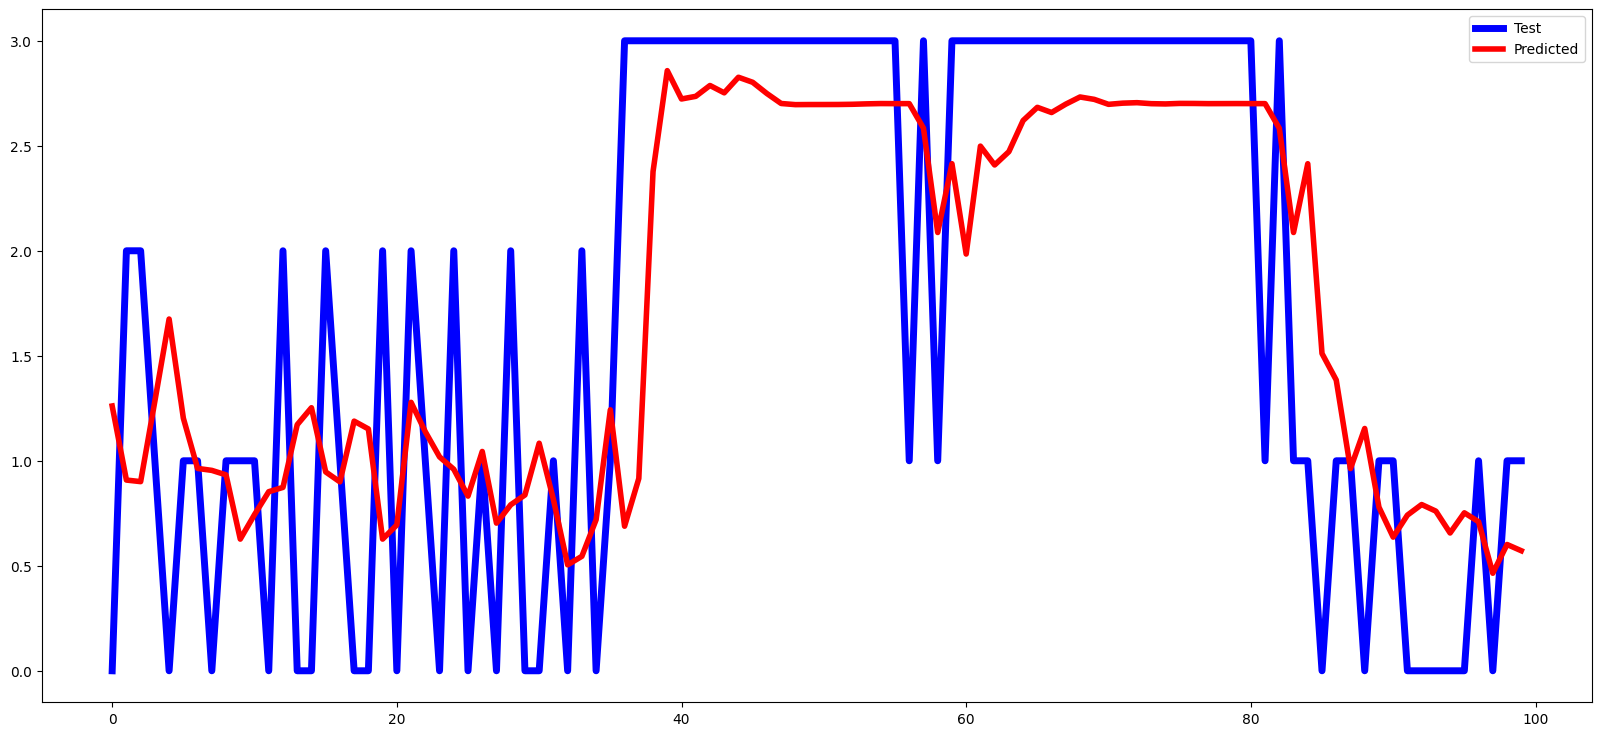

In [77]:
plt.figure(figsize=(20,9))
plt.plot(y_test[:100] , 'blue', linewidth=5)
plt.plot(y_pred[:100],'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()